# Looking at genre popularity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

### Joining imdb_title_basics_df and imdb_ratings_df

The goal here is to see which movie genres performed well based on their average rating.

In [4]:
imdb_basics_rating = pd.merge(left=imdb_basics_df,right=imdb_ratings_df,
                               on='tconst',how='inner')

### Dealing with columns with missing values

In [5]:
imdb_basics_rating = imdb_basics_rating[imdb_basics_rating['genres'].isna() != True]

In [6]:
imdb_basics_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


As we can see, the runtime_minutes is the only column with missing data. Since we do not need this column, we will leave it.

### Finding the top 10 movie genres with at least an 8 average rating

We want to know which movie genres are popular. The way we will distinguish which genres are popular, will be to look at the movies that were rated at least an 8.

In [7]:
ratings_over_8 = imdb_basics_rating[imdb_basics_rating['averagerating'] >= 8]

In [8]:
genres = list(ratings_over_8['genres'].unique())
x = []

for genre in genres:
    x.append(str(genre).split(','))

    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [9]:
sorted_imdb_genres = {k: v for k, v in sorted(genres_freq.items(), key=lambda item: item[1])}
sorted_imdb_genres

{'Game-Show': 1,
 'Short': 1,
 'Reality-TV': 3,
 'Western': 15,
 'News': 17,
 'War': 27,
 'Horror': 28,
 'Sport': 30,
 'Musical': 34,
 'Music': 36,
 'Sci-Fi': 38,
 'Animation': 39,
 'Biography': 49,
 'Crime': 50,
 'History': 50,
 'Family': 52,
 'Fantasy': 53,
 'Romance': 54,
 'Thriller': 58,
 'Mystery': 59,
 'Action': 71,
 'Adventure': 72,
 'Comedy': 116,
 'Documentary': 123,
 'Drama': 147}

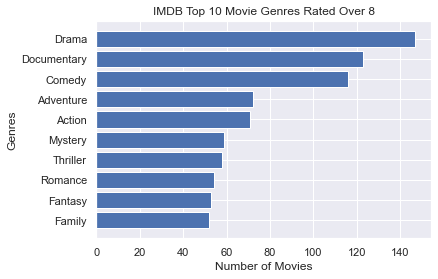

In [10]:
x = list(sorted_imdb_genres.keys())[15:]
y = list(sorted_imdb_genres.values())[15:]

fig, ax = plt.subplots()
ax.barh(x,y)
ax.set_title('IMDB Top 10 Movie Genres Rated Over 8')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genres');

In [11]:
ratings_over_8

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
14,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8
67,tt0406282,Bubbles,Bubbles,2011,80.0,Drama,8.6,18
83,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14
91,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
...,...,...,...,...,...,...,...,...
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73845,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [12]:
genres_ratings_8 = ratings_over_8[['genres','averagerating']]

In [13]:
genres_ratings_8

,genres,averagerating
6,"Adventure,Animation,Comedy",8.1
14,Drama,8.8
67,Drama,8.6
83,Documentary,8.7
91,"Adventure,Animation,Comedy",8.3
...,...,...
73844,Romance,9.0
73845,Documentary,8.1
73849,Drama,8.4
73852,"Drama,Family",8.7


In [14]:
genres = list(genres_ratings_8['genres'].values)

In [15]:
ratings = list(genres_ratings_8['averagerating'].values)

In [16]:
genres[:10]

['Adventure,Animation,Comedy',
 'Drama',
 'Drama',
 'Documentary',
 'Adventure,Animation,Comedy',
 'Documentary',
 'Comedy,Drama,Romance',
 'Documentary',
 'Drama',
 'Documentary']

In [17]:
ratings[:10]

[8.1, 8.8, 8.6, 8.7, 8.3, 9.1, 8.7, 8.5, 8.6, 8.5]

In [18]:
x = []

In [19]:
for genre, rating in zip(genres,ratings):
    if ',' in genre:
        g_list = str(genre).split(',')
        for element in g_list:
            x.append((element,rating))
    else:
        x.append((genre,rating))

In [20]:
x

[('Adventure', 8.1),
 ('Animation', 8.1),
 ('Comedy', 8.1),
 ('Drama', 8.8),
 ('Drama', 8.6),
 ('Documentary', 8.7),
 ('Adventure', 8.3),
 ('Animation', 8.3),
 ('Comedy', 8.3),
 ('Documentary', 9.1),
 ('Comedy', 8.7),
 ('Drama', 8.7),
 ('Romance', 8.7),
 ('Documentary', 8.5),
 ('Drama', 8.6),
 ('Documentary', 8.5),
 ('Action', 8.0),
 ('Comedy', 8.0),
 ('Crime', 8.0),
 ('Comedy', 8.8),
 ('Documentary', 8.5),
 ('Music', 8.5),
 ('Biography', 8.0),
 ('Drama', 8.0),
 ('Documentary', 9.3),
 ('Music', 9.3),
 ('Adventure', 8.6),
 ('Drama', 8.6),
 ('Sci-Fi', 8.6),
 ('Comedy', 8.9),
 ('Drama', 8.9),
 ('Documentary', 8.3),
 ('Documentary', 9.0),
 ('Adventure', 8.2),
 ('Action', 8.1),
 ('Adventure', 8.1),
 ('Sci-Fi', 8.1),
 ('Comedy', 8.7),
 ('Documentary', 8.6),
 ('Documentary', 8.3),
 ('Action', 8.1),
 ('Adventure', 8.1),
 ('Animation', 8.1),
 ('Comedy', 8.3),
 ('Drama', 8.0),
 ('Thriller', 8.0),
 ('Comedy', 8.1),
 ('Documentary', 8.9),
 ('Documentary', 8.1),
 ('Biography', 8.2),
 ('Crime', 8.2)

In [21]:
genre_list = [y[0] for y in x]
ratings_list = [y[1] for y in x] 

In [22]:
genres_ratings = pd.DataFrame([genre_list,ratings_list]).T

In [23]:
genres_ratings.columns = ['genre','ratings']

In [24]:
genres_ratings['ratings'] = genres_ratings['ratings'].astype(float)

In [25]:
average_ratings = genres_ratings.groupby('genre').mean()
average_ratings

,ratings
genre,
Action,8.350847
Adventure,8.464493
Animation,8.242149
Biography,8.493925
Comedy,8.434870
Crime,8.376280
Documentary,8.539928
Drama,8.442803
Family,8.492644


In [26]:
average_ratings.describe()

,ratings
count,25.000000
mean,8.480790
std,0.167600
min,8.242149
25%,8.392632
50%,8.466923
75%,8.517824
max,9.000000


In [29]:
average_ratings.sort_values(by='ratings')
average_ratings.shape

(25, 1)

<AxesSubplot:ylabel='genre'>

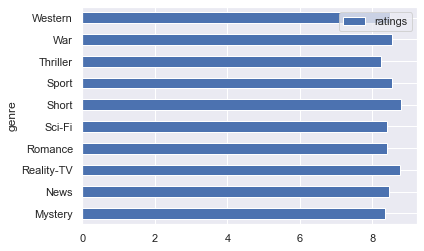

In [30]:
average_ratings[15:].plot.barh()

### Looking at Rotten Tomatoes Genre Ratings

In [10]:
rt_reviews_df.dropna(inplace=True)

In [11]:
joinedrt = rt_movies_df.set_index('id').join(rt_reviews_df, on = 'id', lsuffix = ' guidelines', rsuffix =' critical')

In [12]:
joinedrt = joinedrt.dropna(subset = ['runtime'])

In [13]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 933 non-null    float64
 12  review             933 non-null    object 
 13  rating critical    933 non-null    object 
 14  fresh              933 non-null    object 
 15  critic             933 non-null    object 
 16  top_critic         933 n

In [14]:
joinedrt['freshnum'] = joinedrt['fresh'].map({'fresh': 1, 'rotten': 0})

In [15]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'3/4' : 75, '4/5' : 80, '3/5' : 60, '1/4': 25, '1/5': 20,'3.5/4' : 87, '2/5': 40, '2/4': 50, '3.7/5': 74})

In [16]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2.5/4': 63, '3.5/5' : 70, '5/5': 100, 'B': 85, '4/4': 100, 'B+': 88, "A-": 93, '2.5/5' : 50, "8/10" : 80, 'B-': 82, '4.5/5': 90, '1.5/4': 37.5, 'A': 95, '6/10': 60, 'C+': 77, '9/10': 90, "C": 74, 'C-': 72, '5/10': 50, '1.5/5': 30, '7/10': 70})

In [17]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'0/5':0, '8': 80, '1': 10, '4/10': 40, 'D+': 69, '7': 70, '3/10': 30, 'D': 67, "0.5/4": 13, '6': 60}) 

In [18]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({"3": 30, "D-": 66, "1/10": 10, '0/4' : 0, '8.5/10': 85, "A+": 98, '4.0/4': 100, "8.4/10": 84, "9": 90, "F": 35, "7.5/10": 75, "7.7": 77, "2": 20, "0": 0, "2.0/5": 40, '0.5/10': 5}) 

In [19]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2/10': 20, '5.0/5': 100, '3.0/5': 60, "2.5": 50, '5': 50, '2.2/5': 44})

In [20]:
joinedrt['rating critical'].value_counts()

75.0     122
80.0     113
60.0      85
100.0     76
50.0      76
87.0      74
63.0      46
40.0      44
70.0      41
85.0      33
88.0      29
90.0      24
93.0      22
95.0      16
20.0      15
37.5      15
82.0      14
74.0      13
30.0      13
77.0      13
25.0      11
72.0      11
10.0       6
0.0        6
69.0       4
84.0       2
67.0       2
98.0       2
13.0       2
44.0       1
5.0        1
35.0       1
Name: rating critical, dtype: int64

In [21]:
joinedrt.head()

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date,freshnum
id,,,,,,,,,,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,3.0,"Quickly grows repetitive and tiresome, meander...",74.0,rotten,Eric D. Snider,0.0,EricDSnider.com,"July 17, 2013",0.0
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,3.0,Cronenberg is not a director to be daunted by ...,40.0,rotten,Matt Kelemen,0.0,Las Vegas CityLife,"April 21, 2013",0.0


In [22]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 933 non-null    float64
 12  review             933 non-null    object 
 13  rating critical    933 non-null    float64
 14  fresh              933 non-null    object 
 15  critic             933 non-null    object 
 16  top_critic         933 n

In [23]:
joinedrt['rating critical'] = joinedrt['rating critical']/10
ratings_over_8 = joinedrt[joinedrt['rating critical'] >= 8]

In [24]:
ratings_over_8

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date,freshnum
id,,,,,,,,,,,,,,,,,,,,
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,3.0,The anger over the injustice of the financial ...,8.5,fresh,Robert Roten,0.0,Laramie Movie Scope,"January 7, 2013",1.0
19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing,3.0,A black comedy as dry and deadpan as a bleache...,10.0,fresh,John Beifuss,0.0,"Commercial Appeal (Memphis, TN)","September 10, 2012",1.0
22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,3.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0.0,Arkansas Democrat-Gazette,"September 7, 2012",1.0
35,"In this film, conjoined twins Blake and Franci...",R,Drama,Michael Polish,Michael Polish|Mark Polish,"Jul 30, 1999","Jan 18, 2000",NaN,NaN,110 minutes,NaN,3.0,Though hardly a crowd-pleaser. it's the sort o...,9.3,fresh,Frank Swietek,0.0,One Guy's Opinion,"August 30, 2012",1.0
40,John Sayles' Casa de los Babys tells the tale ...,R,Drama,John Sayles,John Sayles,"Sep 19, 2003","Apr 13, 2004",$,"312,136",95 minutes,NaN,3.0,Cosmopolis is an investment that pays off enor...,10.0,fresh,Peter Sobczynski,0.0,eFilmCritic.com,"August 24, 2012",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN,58.0,All of this is accomplished with wonderfully o...,8.7,fresh,Roger Ebert,1.0,Chicago Sun-Times,"October 23, 2004",1.0
1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures,58.0,"Good, but not great Allen film.",8.0,fresh,Ken Hanke,0.0,"Mountain Xpress (Asheville, NC)","August 14, 2003",1.0
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,58.0,Even the swamps of New Jersey look beautiful.,10.0,fresh,Janet Maslin,1.0,New York Times,"May 20, 2003",1.0


In [25]:
ratings_over_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 13 to 1998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           399 non-null    object 
 1   rating guidelines  405 non-null    object 
 2   genre              404 non-null    object 
 3   director           363 non-null    object 
 4   writer             283 non-null    object 
 5   theater_date       318 non-null    object 
 6   dvd_date           318 non-null    object 
 7   currency           99 non-null     object 
 8   box_office         99 non-null     object 
 9   runtime            405 non-null    object 
 10  studio             138 non-null    object 
 11  id                 405 non-null    float64
 12  review             405 non-null    object 
 13  rating critical    405 non-null    float64
 14  fresh              405 non-null    object 
 15  critic             405 non-null    object 
 16  top_critic         405 n

In [26]:
genres = list(ratings_over_8['genre'].unique())
x = []

for genre in genres:
    x.append(str(genre).split('|'))

    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [27]:
genres_freq
sorted_rt_genres = {k: v for k, v in sorted(genres_freq.items(), key=lambda item: item[1])}
sorted_rt_genres

{'Gay and Lesbian': 1,
 'nan': 1,
 'Cult Movies': 2,
 'Sports and Fitness': 2,
 'Faith and Spirituality': 2,
 'Television': 4,
 'Western': 8,
 'Horror': 13,
 'Animation': 13,
 'Documentary': 14,
 'Special Interest': 15,
 'Musical and Performing Arts': 15,
 'Kids and Family': 19,
 'Romance': 24,
 'Art House and International': 27,
 'Mystery and Suspense': 30,
 'Science Fiction and Fantasy': 33,
 'Classics': 34,
 'Action and Adventure': 41,
 'Comedy': 52,
 'Drama': 60}

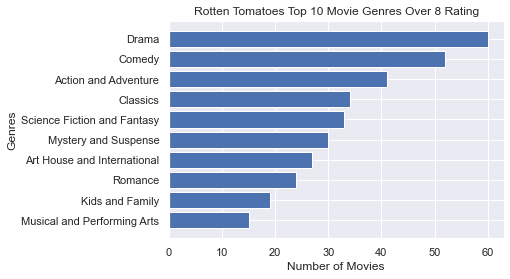

In [28]:
x = list(sorted_rt_genres.keys())[11:]
y = list(sorted_rt_genres.values())[11:]

fig, ax = plt.subplots()
ax.barh(x,y)
ax.set_title('Rotten Tomatoes Top 10 Movie Genres Over 8 Rating')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genres');


### Looking at both IMDB and Rotten Tomatoes popular movie genres

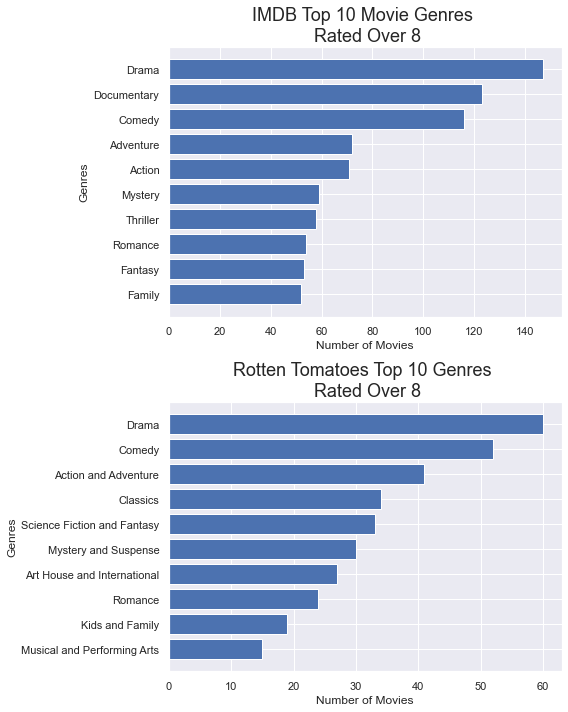

In [29]:
imdb_x = list(sorted_imdb_genres.keys())[15:]
imdb_y = list(sorted_imdb_genres.values())[15:]

rt_x = list(sorted_rt_genres.keys())[11:]
rt_y = list(sorted_rt_genres.values())[11:]

plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.barh(imdb_x,imdb_y)
plt.title('IMDB Top 10 Movie Genres \n Rated Over 8', fontdict = {'fontsize' : 18})
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

plt.subplot(2,1,2)
plt.barh(rt_x,rt_y)
plt.title('Rotten Tomatoes Top 10 Genres \n Rated Over 8', fontdict = {'fontsize' : 18})
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()


The two charts show us that Dramas are the most popular movie genres according to IMDB and Rotten Tomatoes. These movie genres hold a rating of 8 or above, which is an indicator that these genres have the best reception among viewers. Using information from the two charts, we can make the suggestion of creating movies that fall into the Drama, Adventure, and Comedy genres as these are the top three movie genres that are reflected among both datasets.